## A More Detailed Technical Assignment Outline

### **Objective:**
* **Data Extraction:** Demonstrate proficiency in SQL to extract relevant data from a PostgreSQL database.
* **Data Analysis:** Utilize Python (Pandas, NumPy, etc.) to perform exploratory data analysis, including statistical calculations and data cleaning.
* **Data Visualization:** Create interactive visualizations using a front-end framework like React.js and a charting library (e.g., Chart.js, Recharts).
* **Backend Development (Optional):** Develop a REST API using Node.js and Flask to serve data to the frontend.

### **Dataset:**

* **Public Dataset:** Use the Kaggle Titanic dataset.
* **Custom Dataset:** Create a dataset with columns like `Product`, `Sales`, `Revenue`, `Category`, and `Region`.

### **Technical Tasks:**

#### **1. Data Extraction (PostgreSQL):**
* Establish a connection to the PostgreSQL database.
* Write SQL queries to:
  * Retrieve specific columns (e.g., `PassengerId`, `Survived`, `Pclass`).
  * Filter data based on conditions (e.g., `Sex`, `Age`).
  * Aggregate data (e.g., calculate average age by passenger class).

#### **2. Data Analysis (Python):**
* **Data Cleaning:**
  - Handle missing values (e.g., imputation, removal).
  - Convert data types as needed.
  - Outlier detection and treatment.
* **Exploratory Data Analysis (EDA):**
  - Calculate summary statistics (mean, median, mode, standard deviation).
  - Visualize data distributions (histograms, box plots).
  - Identify correlations between variables (correlation matrix, scatter plots).
  - Analyze categorical data (bar charts, pie charts).
* **Feature Engineering:**
  - Create new features (e.g., family size, title from name).

#### **3. Data Visualization (React.js):**
* **Frontend Development:**
  - Create a user-friendly interface to select chart types and filter data.
  - Use a charting library to render visualizations:
    - Bar charts (e.g., survival rates by sex, class)
    - Pie charts (e.g., distribution of passenger classes)
    - Histograms (e.g., age distribution)
    - Box plots (e.g., fare distribution by class)
    - Scatter plots (e.g., age vs. fare)
  - Implement interactive features like zooming, panning, and tooltips.
* **Backend (Optional):**
  - Develop a Node.js and Flask backend to serve data to the frontend.
  - Create API endpoints for data fetching and visualization.


In [1]:
pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 1.4 MB/s eta 0:00:01
   ----

Import Relevent Liberieries\ Modules
-

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Read the data
-

In [7]:
df = pd.read_csv('gender_submission.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
df.info

<bound method DataFrame.info of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [12]:
df.shape

(418, 2)

In [8]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
df1.shape

(418, 11)

In [10]:
df2 = pd.read_csv('train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df2.shape

(891, 12)

In [19]:
df.describe #describe the function of Gender Submission

<bound method NDFrame.describe of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [20]:
df1.describe #describe the function of test

<bound method NDFrame.describe of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked 

In [21]:
df2.describe #describe the function of train

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 


- **For Handle missing values**
- **To convert the  data types**
- **Remove the duplicates**
- **Print the cleaned DataFrame**


In [ ]:
#Age has missing values from the df1 You can decide to
#Drop these rows using df.dropna(subset=['Age'], inplace=True).
#Impute them using the mean or median

In [23]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [24]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [27]:
# lets Handle missing values
df1.dropna(subset=['Age', 'Embarked'], inplace=True)
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

# Convert data types
df1['Age'] = df1['Age'].astype(int)

# Remove all the duplicates
df1.drop_duplicates(inplace=True)

# Print the cleaned DataFrame
print(df1.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0   34      0      0   330911   7.8292   NaN        Q  
1   47      1      0   363272   7.0000   NaN        S  
2   62      0      0   240276   9.6875   NaN        Q  
3   27      0      0   315154   8.6625   NaN        S  
4   22      1      1  3101298  12.2875   NaN        S  


for the Data frame 2


In [ ]:
#Age has missing values in df2. Handle them similarly to the second DataFrame.
#Embarked has 2 missing values. Decide on dropping them or imputing with a mode.

#Similar to the second DataFrame, consider converting Age to integer.

In [28]:
# For Handle missing values
df2.dropna(subset=['Age', 'Embarked'], inplace=True)
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

# To convert the  data types
df2['Age'] = df2['Age'].astype(int)

# Remove the duplicates
df2.drop_duplicates(inplace=True)

# Print the cleaned DataFrame
print(df2.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex  Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
6                             McCarthy, Mr. Timothy J    male   54      0   
10                    Sandstrom, Miss. Marguerite Rut  female    4      1   
11                           Bonnell, Miss. Elizabeth  female   58      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


Lets check Duplicated data 
-

In [29]:
df.duplicated().sum()

0

In [30]:
df1.duplicated().sum()

0

In [31]:
df2.duplicated().sum()

0

In [ ]:
Outlier 

<Axes: >

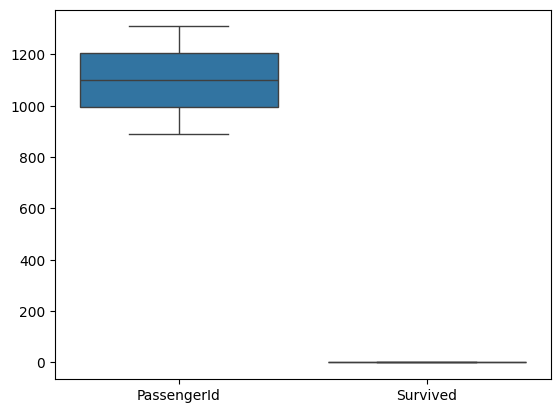

In [33]:
sns.boxplot(df)
#for individuality

<Axes: >

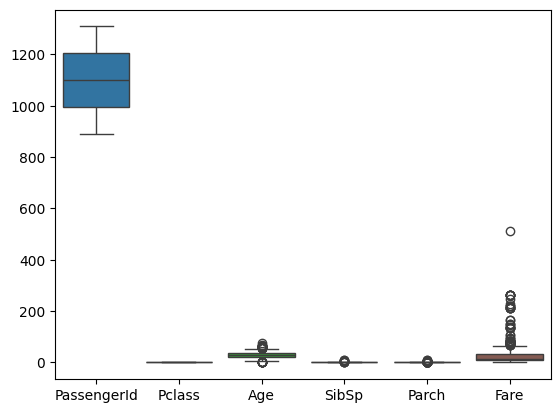

In [34]:
sns.boxplot(df1)
#for individuality

<Axes: >

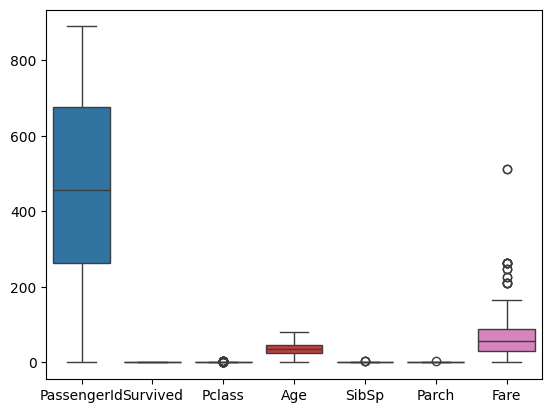

In [35]:
sns.boxplot(df2)
#for individuality

Data vizulization
-

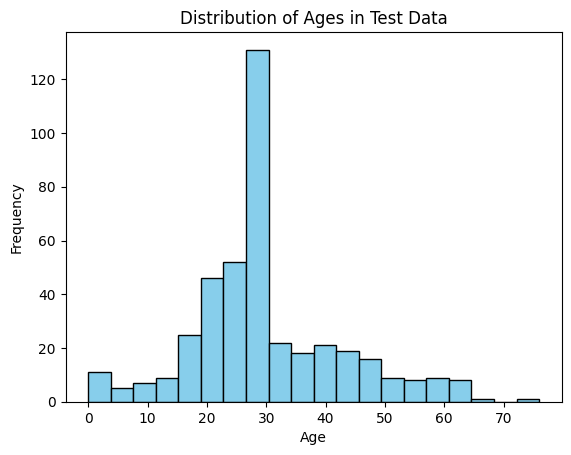

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in Test Data')
plt.show()

**Bar Chart of Embarkation Ports**

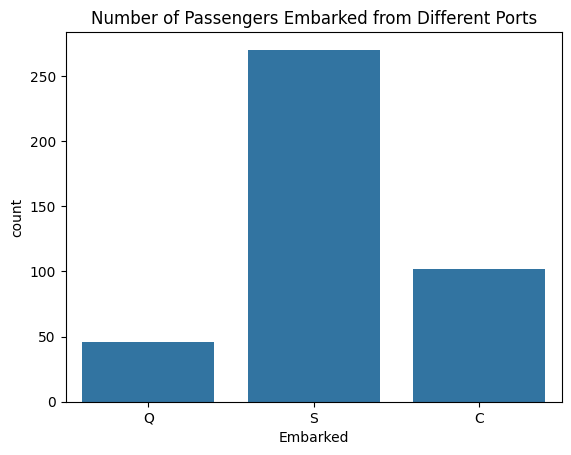

In [38]:
sns.countplot(x='Embarked', data=df1)
plt.title('Number of Passengers Embarked from Different Ports')
plt.show()

For df2
**Survival Rates by Sex**

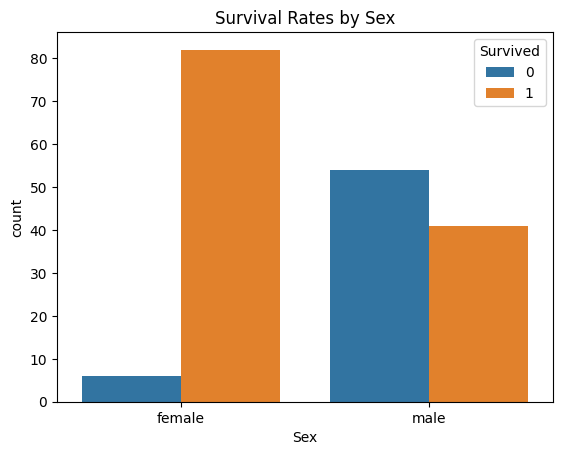

In [39]:
sns.countplot(x='Sex', hue='Survived', data=df2)
plt.title('Survival Rates by Sex')
plt.show()

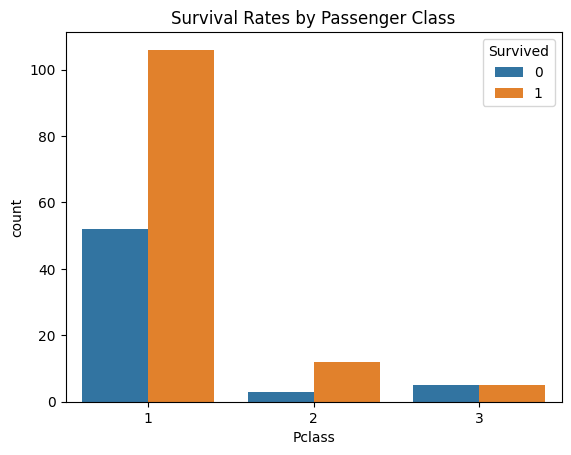

In [40]:
sns.countplot(x='Pclass', hue='Survived', data=df2)
plt.title('Survival Rates by Passenger Class')
plt.show()

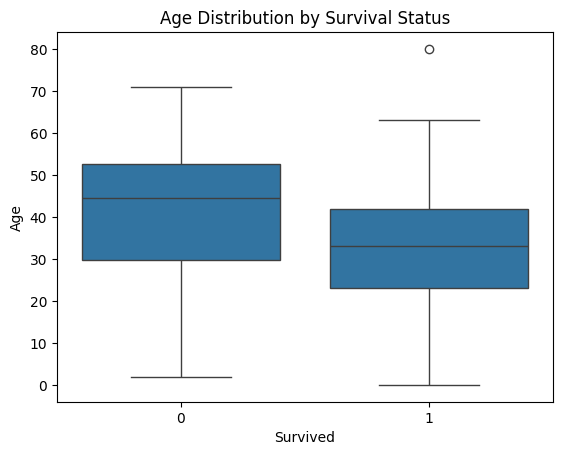

In [41]:
sns.boxplot(x='Survived', y='Age', data=df2)
plt.title('Age Distribution by Survival Status')
plt.show()

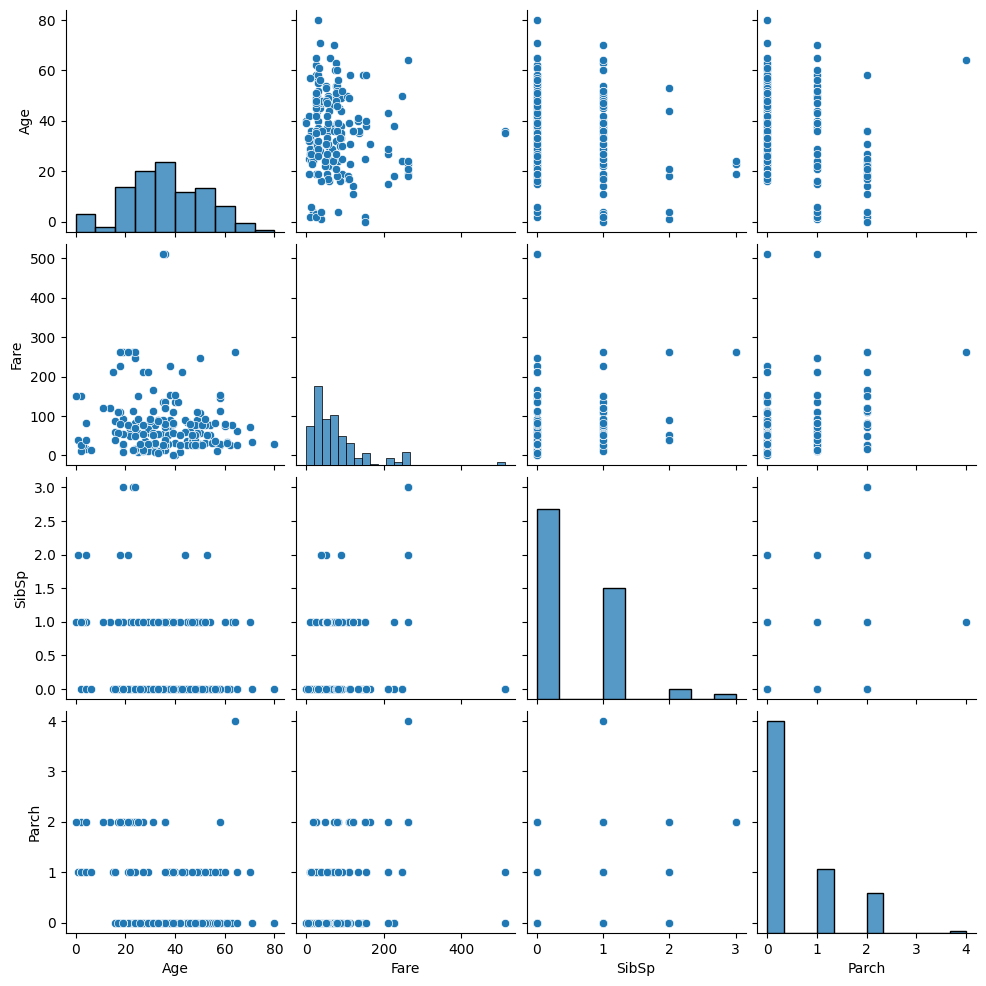

In [42]:
sns.pairplot(df2[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

In [46]:
import psycopg2

def connect_to_db(db_name, user, password, host, port):
    try:
        conn = psycopg2.connect(
            database=db_name,
            user=user,
            password=password,
            host=host,
            port=port
        )
        return conn
    except (Exception, psycopg2.Error) as error:
        print("Error while connecting to PostgreSQL", error)
        return None

# Replace with your database credentials
db_name = "your_database_name"
user = "your_username"
password = "your_password"
host = "your_host"
port = "5432"  # Replace with the correct port number

conn = connect_to_db(db_name, user, password, host, port)

if conn:
    # Your SQL queries here
    # ...
    conn.close()
else:
    print("Failed to connect to the database.")

Error while connecting to PostgreSQL could not translate host name "your_host" to address: No such host is known. 

Failed to connect to the database.
